## MEDICAL CHARGES PRADICTION


## Problem statement 
QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px

In [2]:
df=pd.read_csv("C:\\Users\\patha\\Downloads\\medical-charges.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.duplicated(df)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
fig=px.histogram(
    df,
    x='age',
    marginal='box',
    nbins=47,
    title='Distribution of age')
fig.update_layout(bargap=0.1)

fig.show()


The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the number of people of any given age (between 18 & 64) in the USA.

<Axes: xlabel='bmi', ylabel='Density'>

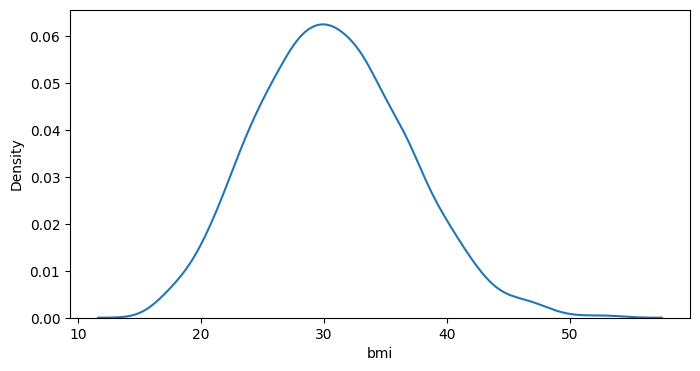

In [7]:
fig, axes = plt.subplots( figsize=(8, 4))

fig=px.histogram(
    df,
    x='bmi',
    marginal='box',
    nbins=47,
    title='Distribution of age')
fig.update_layout(bargap=0.1)

fig.show()

sns.kdeplot(data=df,x='bmi')


The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

<Axes: xlabel='charges', ylabel='Density'>

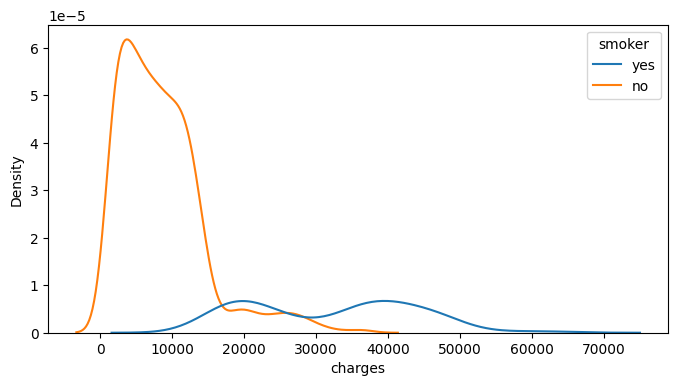

In [8]:
fig, axis=plt.subplots(figsize=(8,4))

fig=px.histogram(df,x='charges',marginal='box',title='Disribution of charges',color='smoker')
fig.update_layout(bargap=0.1)
fig.show()
sns.kdeplot(data=df,x='charges',hue='smoker')


We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7300
the median for smokers is close to
35,000.|

## Smoker
 Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [9]:

df['smoker'].value_counts(normalize=True)*100

smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64

In [10]:
px.histogram(df,x='smoker',color='sex')

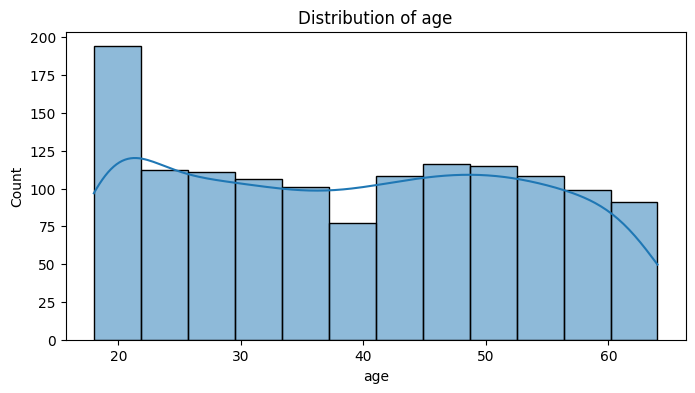

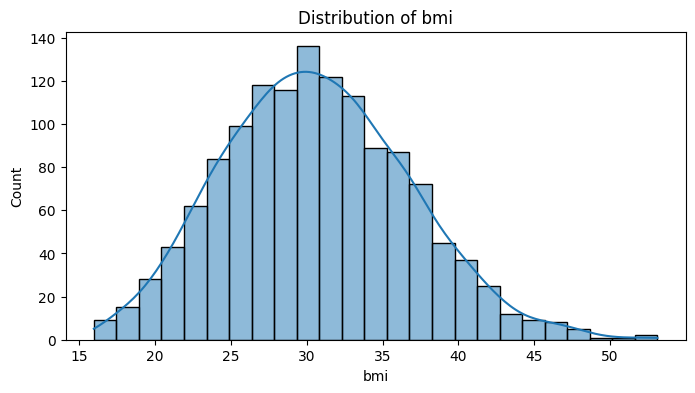

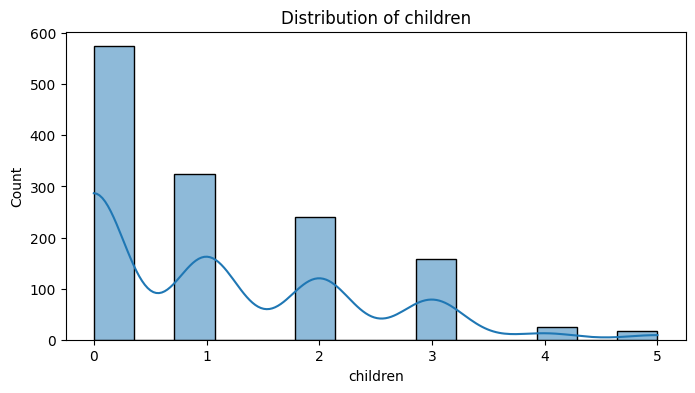

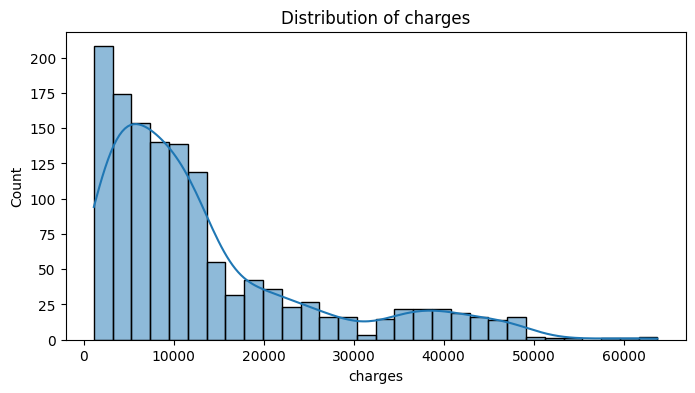

In [11]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: xlabel='children', ylabel='count'>

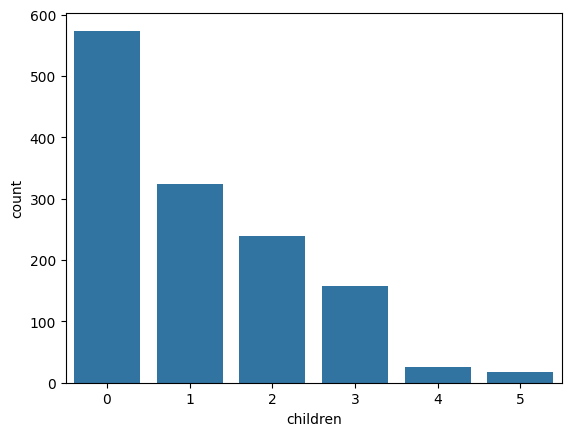

In [12]:
sns.countplot(data=df,x='children')

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [14]:
fig=px.scatter(df,x='age',y='charges')
fig.show()
## like if we see different variation in same plot we use more divider like hue, 
## like in this plot we see three division so we can divide it by smoker 

In [15]:
fig=px.scatter(df,x='age',y='charges',color='smoker')
fig.show()


We can make the following observations from the above chart:

The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

In [16]:
fig=px.scatter(df,x='bmi',y='charges',color='smoker')
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

In [17]:

fig=px.violin(df,x='children',y='charges')
fig.update_traces(marker_size=5)
fig.show()

## Correlation

In [18]:

df['charges'].corr(df['age'])

np.float64(0.2990081933306478)

In [19]:
smoker_numeric=df['smoker'].map({'no':0,'yes':1})
df['charges'].corr(smoker_numeric)


np.float64(0.7872514304984778)

clearly shows that smokers are very closely correleted

In [20]:
num_df=df.select_dtypes(include='number')
num_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

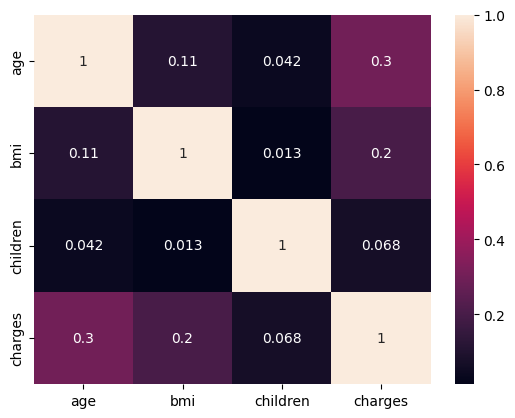

In [21]:
sns.heatmap(num_df.corr(),annot=True)

## 
Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [22]:
df_non_smokers=df[df['smoker']=='no']
df_smokers=df[df['smoker']=='yes']


<Axes: xlabel='age', ylabel='charges'>

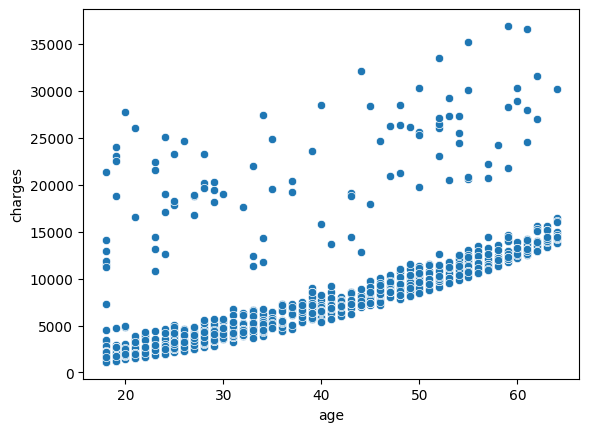

In [23]:
sns.scatterplot(data=df_non_smokers,x='age',y='charges')

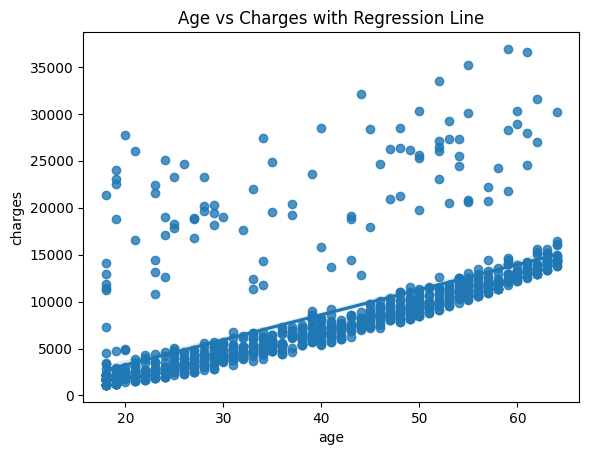

In [24]:
sns.regplot(x='age', y='charges', data=df_non_smokers)
plt.title('Age vs Charges with Regression Line')
plt.show()

In [25]:
def estimate_charges(age,w,b):
    return w*age+b

w=267
b=-2091

In [26]:
estimate_charges(40,w,b)

8589

In [27]:
non_smokers_ages=df_non_smokers['age']
non_smokers_ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [28]:
estimate_charges=estimate_charges(non_smokers_ages,w,b)
estimate_charges

1        2715
2        5385
3        6720
4        6453
5        6186
        ...  
1332    11793
1333    11259
1334     2715
1335     2715
1336     3516
Name: age, Length: 1064, dtype: int64

<Axes: xlabel='age', ylabel='age'>

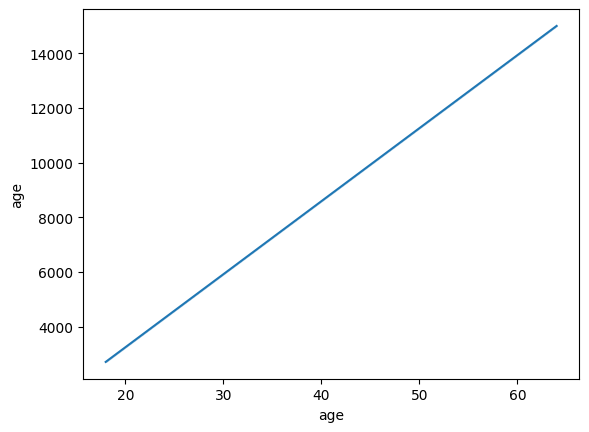

In [29]:
sns.lineplot(x=non_smokers_ages,y=estimate_charges)

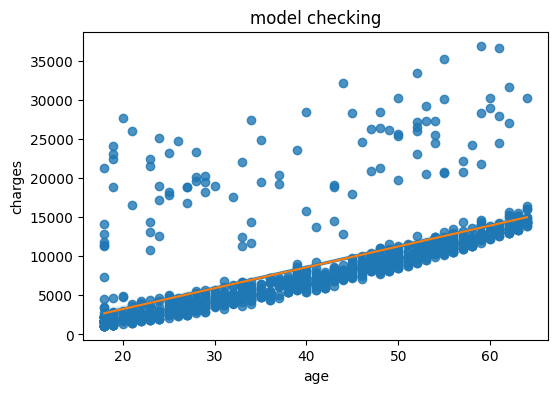

In [30]:


plt.figure(figsize=(6,4))

sns.regplot(x='age', y='charges', data=df_non_smokers)## ACTUAL DISTRIBUTION
sns.lineplot(x=non_smokers_ages,y=estimate_charges)## ESTIMATED DISRIBUTION

plt.title('model checking')

plt.show()


## Linear Regression using Scikit-learn

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()

In [33]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [34]:
input_non_smoker=df_non_smokers[['age']]# must be 2d matrix or dataframe 
target_non_smoker=df_non_smokers['charges']


In [35]:
model.fit(input_non_smoker,target_non_smoker)#main model training 

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
model.predict(np.array([[23],[37],[45]]))

c:\Users\patha\OneDrive\Desktop\pythonlib\myvenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4055.30443855, 7796.78921819, 9934.78052084])

In [37]:
predictions=model.predict(input_non_smoker)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

Let's compute the RMSE loss to evaluate the model.

In [38]:
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x-y)))

In [39]:
rmse(target_non_smoker,predictions)


np.float64(4662.505766636395)

In [40]:
#w

model.coef_

array([267.24891283])

In [41]:
#b
model.intercept_

np.float64(-2091.4205565650864)

<Axes: xlabel='age', ylabel='charges'>

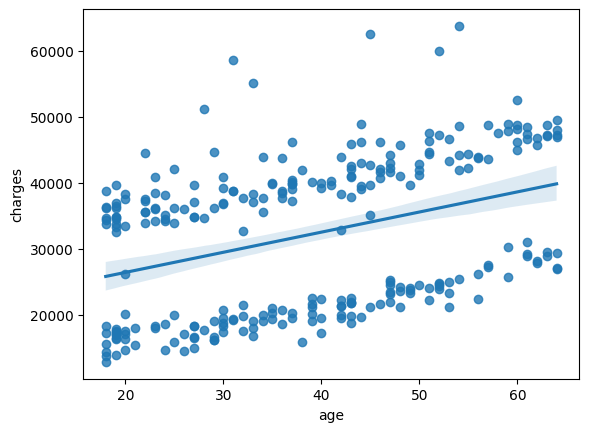

In [42]:
sns.regplot(data=df_smokers,x='age',y='charges')

In [43]:
input_smokers=df_smokers[['age']]
target_smoker=df_smokers["charges"]

In [44]:
model2=LinearRegression()



In [45]:
help(model2.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [46]:
model2.fit(input_smokers,target_smoker)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
model2.predict(np.array([[24],[40]]))

c:\Users\patha\OneDrive\Desktop\pythonlib\myvenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27619.83057755, 32503.63221131])

In [48]:
predictions_smokers=model2.predict(input_smokers)


In [49]:
rmse(target_smoker,predictions_smokers)

np.float64(10711.00334810241)

In [50]:
target_smoker.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

## Using Categorical Features for Machine Learning
using only numerical features are not able to give a good pradiction and there RMSE loss is very high 

In [51]:
df['smoker_code']=df['smoker'].map({'no':0,'yes':1})
df['charges'].corr(df['smoker_code'])
df["sex_code"]=df['sex'].map({'female':0,'male':1})


In [52]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_
one_hot=enc.transform(df[['region']]).toarray()
one_hot
df[['northeast', 'northwest', 'southeast', 'southwest']] =one_hot
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [53]:
input_1,target_1=df[['age','bmi','children','smoker_code']],df['charges']

In [54]:
model=LinearRegression()

In [55]:
model.fit(input_1,target_1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [56]:
predictions=model.predict(input_1)
predictions


array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541], shape=(1338,))

In [58]:
loss=rmse(target_1,predictions)
print(loss)



6056.439217188081


Here other factors donot like region ,children donot have strong correlation with charges like if i use fratures like region , children we cannot get high difference in loss , so we can remove these kind of feature for model training 

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
 8   sex_code     1338 non-null   int64  
 9   northeast    1338 non-null   float64
 10  northwest    1338 non-null   float64
 11  southeast    1338 non-null   float64
 12  southwest    1338 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 136.0+ KB


In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
input,target=df[input_cols],df['charges']

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(input,target)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
predictions=model.predict(input)
predictions

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757], shape=(1338,))

In [ ]:
loss=rmse(target,predictions)
loss

np.float64(6041.6796511744515)

<Axes: >

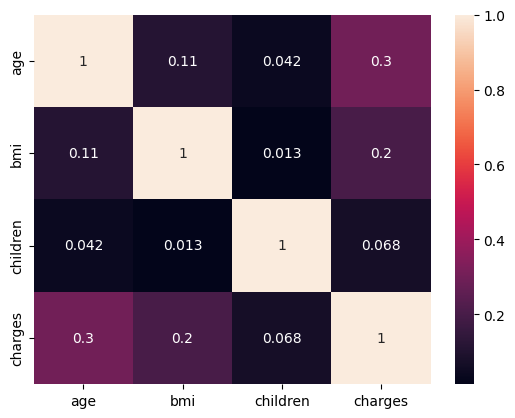

In [ ]:
df
corr_matrix=num_df.corr()
corr_matrix
sns.heatmap(corr_matrix,alpha=True,annot=True)

In [59]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
scalar=StandardScaler()

In [70]:
encode_input=df[['age','bmi']]

In [74]:


df[['bmi','age']] = scalar.fit_transform(df[['bmi','age']])


In [ ]:
input_cols_final=

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,-1.438764,female,-0.453320,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,-1.509965,male,0.509621,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,-0.797954,male,0.383307,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,-0.441948,male,-1.305531,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,-0.513149,male,-0.292556,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,male,0.050297,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,-1.509965,female,0.206139,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,-1.509965,female,1.014878,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,-1.296362,female,-0.797813,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0
